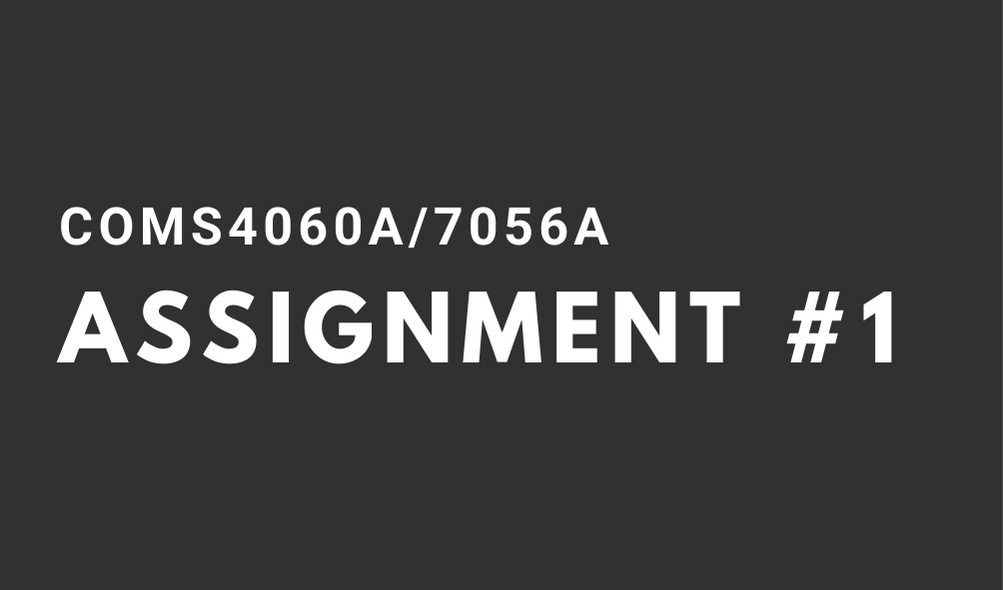

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

### Sources for conversion rates
* US Gallons were used: https://www.unitconverters.net/volume/gallons-to-liters.htm
* For Length: https://www.unitconverters.net/length-converter.html
* US Dollar: https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=ZAR
* Pound: https://www.xe.com/currencyconverter/convert/?Amount=0.92&From=GBP&To=ZAR
* Euro: https://www.xe.com/currencyconverter/convert/?Amount=0.92&From=EUR&To=ZAR
* Canadian Dollar: https://www.xe.com/currencyconverter/convert/?Amount=0.92&From=CAD&To=ZAR


In [260]:
df = pd.read_csv('logbook_assignment1.csv', header=None)

In [261]:
df.columns = ['date_fueled', 'date_captured', 'odometer', 'gallons', 'cost_per_gallon', 'total_spent', 'mpg', 'miles', 'user_url']

In [262]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
2,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
3,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
4,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233


# 1. Data Cleaning

## 1.1 Data Fields

In [263]:
df_new = df

#3 Convert the column to a date format, setting any invalid date fueled entries to NaT
df_new['date_fueled']=pd.to_datetime(df_new['date_fueled'],errors='coerce')

#### Identify what percentage of date_fueled entries are not proper dates.

In [264]:
column = 'date_fueled'
count = 0
for i in range(len(df_new)):
    #print('h')
    if str(df_new[column][i]) == 'NaT':
        #print('e')
        count = count + 1
    else:
        continue

print("Percentage of date_fueled entries are not proper dates",(count/len(df)*100),"%")

Percentage of date_fueled entries are not proper dates 11.657705399145948 %


#### Remove dates that are in the future, or dates that are earlier than 200

In [265]:
df_tmp = df_new
for i in range(len(df_tmp)):
    if df_tmp['date_fueled'][i].year >2022 or df_tmp['date_fueled'][i].year <2005:
        #replacing out of range dates with 0
        df_tmp['date_fueled'][i] = 0

In [266]:
df_new['date_fueled'] = df_new['date_fueled'].replace(0, np.nan)

In [267]:
df1 = df_new.dropna(subset=['date_fueled'])

In [268]:
df1.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
2,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
3,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
4,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
5,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...
6,2021-10-23,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...


In [269]:
len(df1)

1037165

#### Plot of distribution of fueling dates
* We see from the histogram below that most of the dates lie in 2022, the current year, and very few data points lie in the range of years 2005-2010

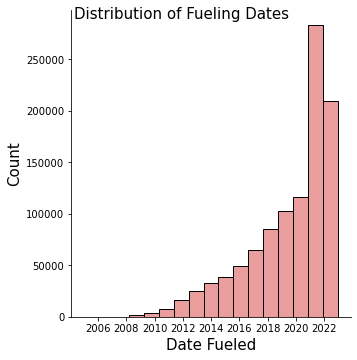

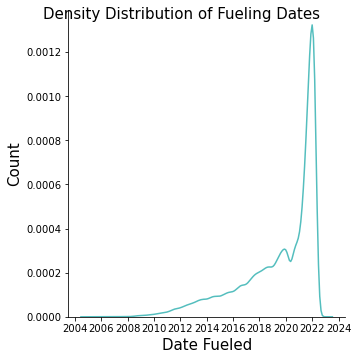

<Figure size 1080x432 with 0 Axes>

In [270]:
#fig, axs = plt.subplots(1,2, sharex=False, figsize=(14,5))
#5
r = sns.displot(df1.date_fueled,bins = 17, color='#e27c7c') #17 bins since 2022 - 2005 = 17 years
plt.suptitle("Distribution of Fueling Dates",fontsize=15)
r.set_axis_labels(x_var="Date Fueled", y_var="Count", fontsize=15)
plt.show()

j = sns.displot(df1.date_fueled, kind="kde", color='#54bebe')
plt.suptitle("Density Distribution of Fueling Dates",fontsize=15)
j.set_axis_labels(x_var="Date Fueled", y_var="Count", fontsize=15)
plt.show()

plt.tight_layout()

## 1.2 Numeric Fields

In [271]:
df12 = df1

In [272]:
#3 Converting to float
df12['odometer'] = df12['odometer'].str.replace(',', '').astype(float)
df12['gallons'] = df12['gallons'].str.replace(',', '').astype(float)
df12['miles'] = df12['miles'].str.replace(',', '').astype(float)
df12['mpg'] = df12['mpg'].str.replace(',', '').astype(float)

In [273]:
df12.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
2,2012-11-07,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
3,2012-09-22,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
4,2019-05-04,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
5,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...
6,2021-10-23,Oct 23 2021,147567.0,3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...


In [274]:
df12.reset_index(drop=True, inplace=True)

#### The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it

In [275]:
#2 ######################## This operation roughly takes 15 mins, runs with caution #####################
for i in range(len(df12)):
    if str(df12['miles'][i]) == 'nan' or df12['miles'][i] == 0.0:
        df12['miles'][i] = (df12['gallons'][i])*(df12['mpg'][i])
        
    elif str(df12['mpg'][i]) == 'nan' or df12['mpg'][i] == 0.0:
        df12['mpg'][i] = (df12['miles'][i])/(df12['gallons'][i])
        
    elif str(df12['gallons'][i]) == 'nan' or df12['gallons'][i] == 0.0:
        df12['gallons'][i] = (df12['miles'][i])/(df12['mpg'][i])

In [276]:
cols = ['gallons','odometer','mpg','miles']
df12[cols] = df12[cols].replace(0, np.nan)

#### Identify what percentage of gallons, miles, odometer and entries are missing

In [277]:
column = 'gallons'
count1 = 0
for i in range(len(df12)):
    if str(df12[column][i]) == 'nan':
        count1 = count1 + 1

gallonsPercentage =(count1/len(df12)*100)

In [278]:
column = 'miles'
count2 = 0
for i in range(len(df12)):
    if str(df12[column][i]) == 'nan':
        count2 = count2 + 1

milesPercentage =(count2/len(df12)*100)

In [279]:
column = 'odometer'
count3 = 0
for i in range(len(df12)):
    if str(df12[column][i]) == 'nan':
        count3 = count3 + 1

odometerPercentage =(count3/len(df12)*100)

In [280]:
#1
print('Percentage of gallons entries missing',gallonsPercentage,'%')
print('Percentage of miles entries missing',milesPercentage,'%')
print('Percentage of odometer entries missing',odometerPercentage,'%')

Percentage of gallons entries missing 8.753284192968332 %
Percentage of miles entries missing 76.23820703552472 %
Percentage of odometer entries missing 11.614738252833446 %


In [281]:
df12 = df12.dropna(subset=['gallons','odometer','mpg','miles'])

In [282]:
df12.reset_index(drop=True, inplace=True)

#### Distributions of gallons, miles, odometer
* The distribution of gallons, miles and odometer seem to be very positively skewed, the mean is greater than the median as the data is more towards the lower side and the mean average of all the values

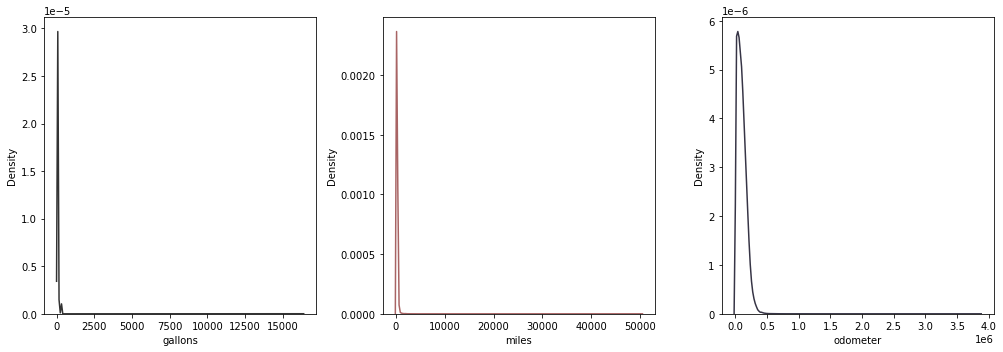

In [283]:
#4
fig, axs = plt.subplots(1,3, sharex=False, figsize=(14,5))
sns.distplot(df12.gallons, hist=False, color='#333333',ax=axs[0])

sns.distplot(df12.miles, hist=False, color='#a86464',ax=axs[1])

sns.distplot(df12.odometer, hist=False, color='#363445',ax=axs[2])
plt.tight_layout()

* The results below do makes sense, we do not have any infinities or Nan values

In [284]:
#5
df12.describe().T

,count,mean,std,min,25%,50%,75%,max
odometer,128024.0,100990.707602,75554.757101,7.0000,43602.7500,88933.50000,144719.2500,3861013.000
gallons,128024.0,13.062689,47.815948,0.1000,9.5840,12.36100,15.1700,16378.667
mpg,128024.0,25.241999,14.559705,0.1000,18.0000,23.00000,29.5000,399.900
miles,128024.0,302.786792,242.771988,0.2898,220.2497,283.67365,353.6838,50356.800


# 2. Feature Engineering

In [285]:
df2 = df12

In [286]:
# The 'total_spent' column is copied to a column named 'Currency'
# Then to extact the currency symbol the numbers and anything else is striped away
# leaving us just with the currency symbol under 'Currency'

#1
df2[['Currency']] = df2[['total_spent']]

In [287]:
df2['Currency']= df2['Currency'].str.replace('\d+', '')

In [288]:
df2['Currency']= df2['Currency'].str.replace('.', '')

In [289]:
df2['Currency']= df2['Currency'].str.replace(',', '')

In [290]:
#2 is done later on in the notebook in section 4

In [291]:
# The url is split into columns using the '/' as a delimeter and the unneccesary columns are dropped
#3
df2[["dummy0","dummy1","dummy2","Car make","Car Model","Year","User_ID","dummy7"]] = df2["user_url"].str.split('/', expand=True)

In [292]:
df2.pop("dummy0")
df2.pop("dummy1")
df2.pop("dummy2")
df2.pop("dummy7")

0         None
1         None
2         None
3         None
4         None
          ... 
128019    None
128020    None
128021    None
128022    None
128023    None
Name: dummy7, Length: 128024, dtype: object

In [293]:
df2.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID
0,2012-11-07,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,bmw,x3,2009,461150
1,2012-09-22,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,mercedes-benz,e300,1998,133501
2,2019-05-04,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,bmw,320d,2010,247233
3,2021-10-23,Oct 23 2021,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,volkswagen,passat,2004,445811
4,2021-11-20,Dec 12 2021,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,mazda,3_sport,2010,529810


Converting all the units to proper measurements

In [294]:
df2[['litres']] = df2[['gallons']]*3.78541

In [295]:
df2[['km']] = df2[['miles']]*1.60934

In [296]:
df2['L/100km'] = ((df2['litres'])/(df2['km']))*100

In [297]:
df2.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km
0,2012-11-07,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,bmw,x3,2009,461150,45.879169,616.364345,7.443514
1,2012-09-22,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,mercedes-benz,e300,1998,133501,30.249211,366.516724,8.253160
2,2019-05-04,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,bmw,320d,2010,247233,40.030711,796.478459,5.025963
3,2021-10-23,Oct 23 2021,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,volkswagen,passat,2004,445811,12.919604,159.287645,8.110864
4,2021-11-20,Dec 12 2021,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,mazda,3_sport,2010,529810,34.235248,429.368693,7.973392


# 3. Vehicle Exploration

In [298]:
df2['User_ID'] = df2[['User_ID']].astype({'User_ID':'float'})

In [299]:
df2 = df2.dropna(subset=['User_ID'])

In [300]:
df2.reset_index(drop=True, inplace=True)

#### Plot the number of unique users per country

In [301]:
#1
country = df2.groupby(['Currency'],).count()

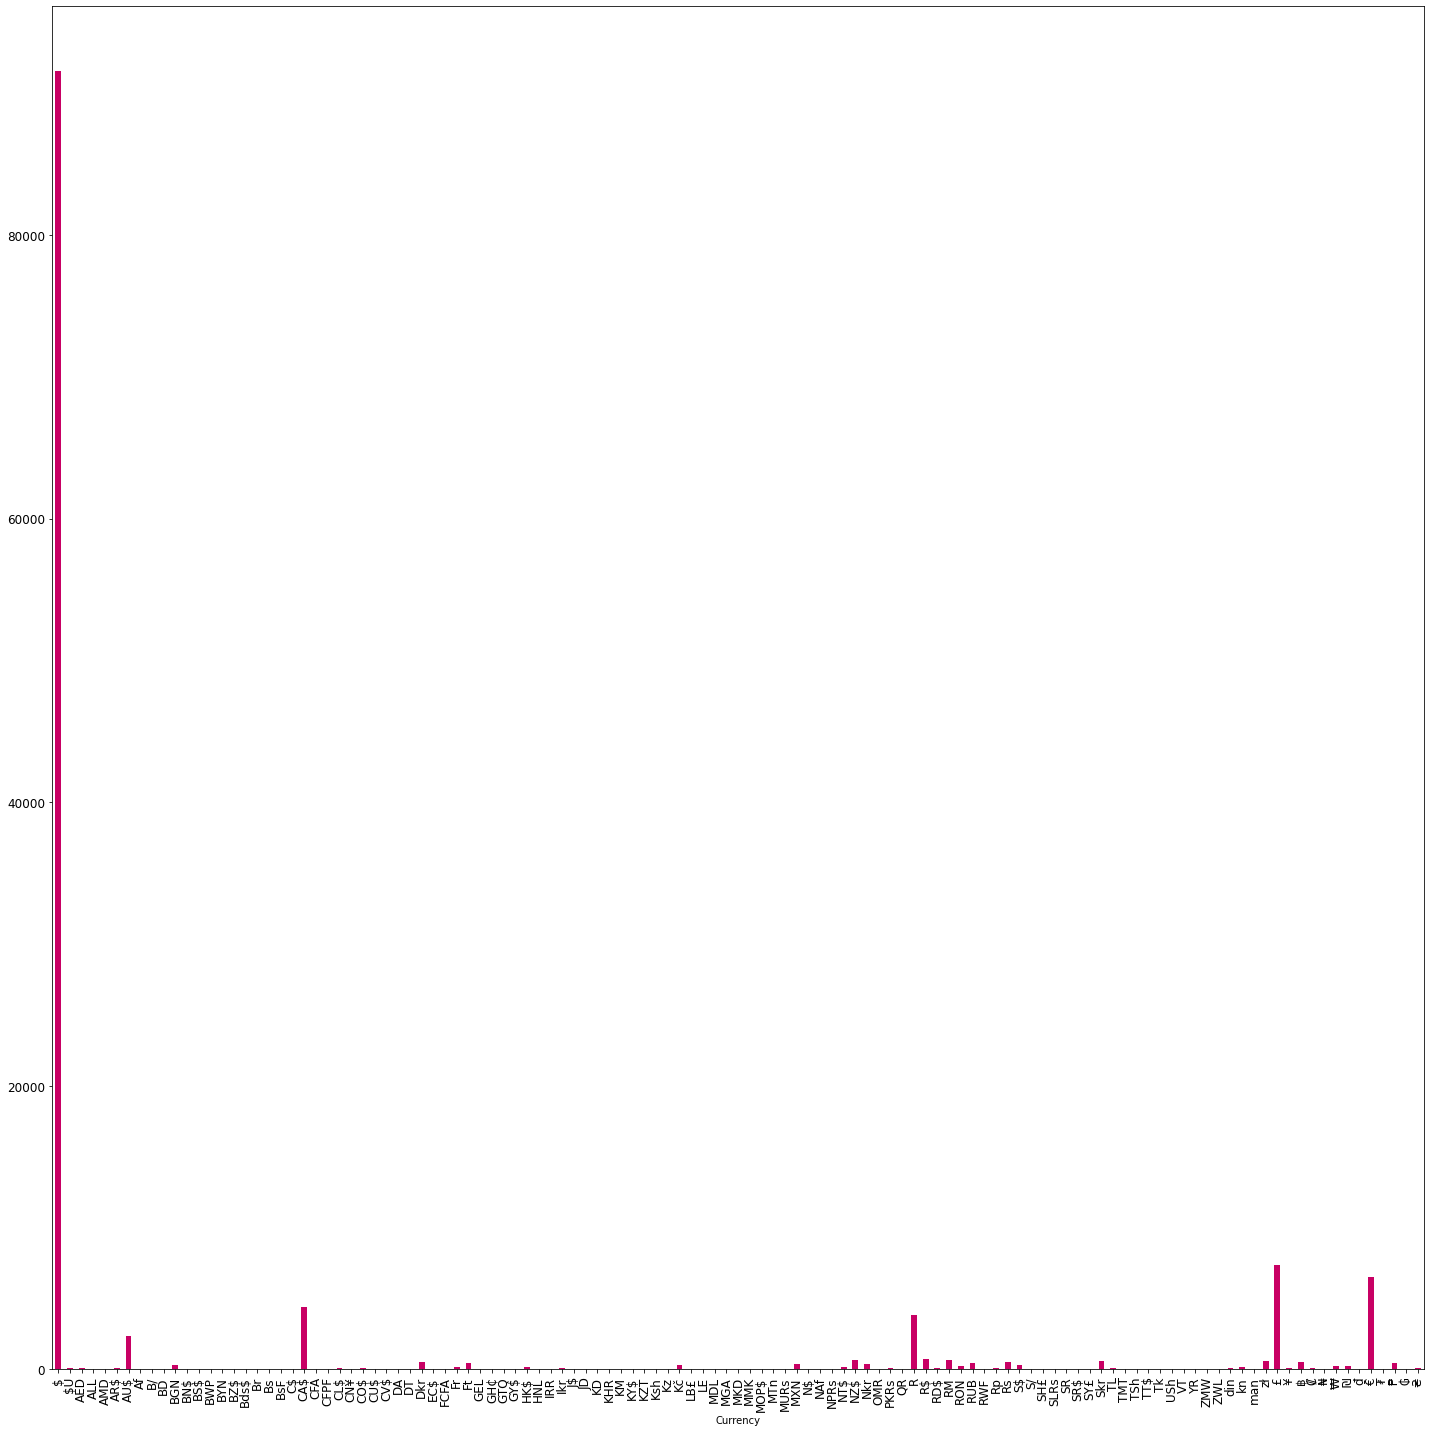

In [304]:
# Please Zoom into the plot for better visuals :)
country.User_ID.plot(kind='bar', color='#c80064', fontsize=12)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
#plt.xticks(rotation=30, horizontalalignment="center")
plt.tight_layout()
plt.rcParams["figure.figsize"] = [20,20]

#### Look at the popularity of the app: plot the number of unique users per day

In [ ]:
# There were about 6000 days all together, therefore the plot is crowded 
#2
dates = df2.groupby(['date_fueled']).count()

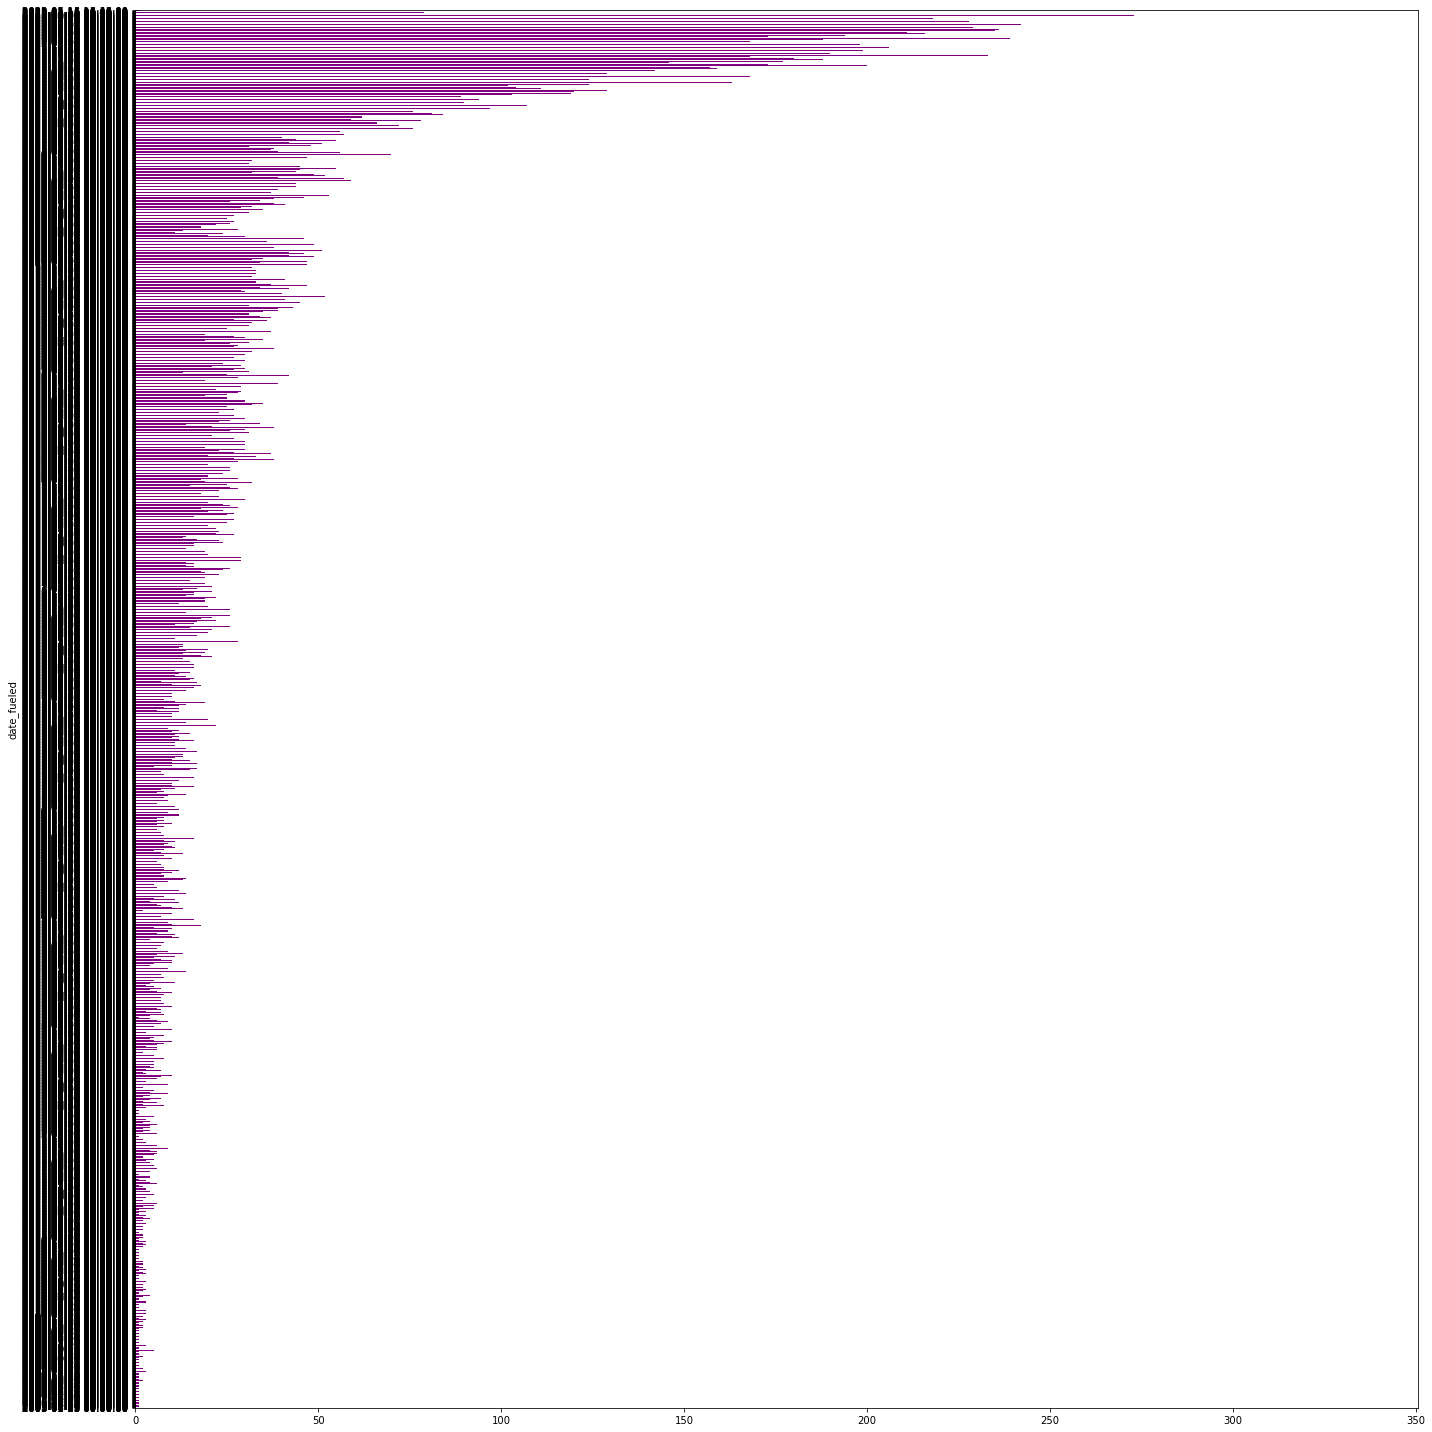

In [306]:
dates.User_ID.plot(kind='barh', color="purple")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
#plt.xticks(rotation=30, horizontalalignment="center")
plt.tight_layout()
plt.rcParams["figure.figsize"] = [20,20]

In [307]:
df2['Year'] = pd.to_numeric(df2['Year'],errors='coerce')

In [308]:
df2 = df2.dropna(subset=['Year'])

#### Look at the distribution of age of the vehicles per country - look at the year of the vehicle. Remember to look at the date it was refueled, not the current date

In [309]:
#3
h = df2.groupby(['Currency','Year']).count()

<AxesSubplot:xlabel='Currency,Year'>

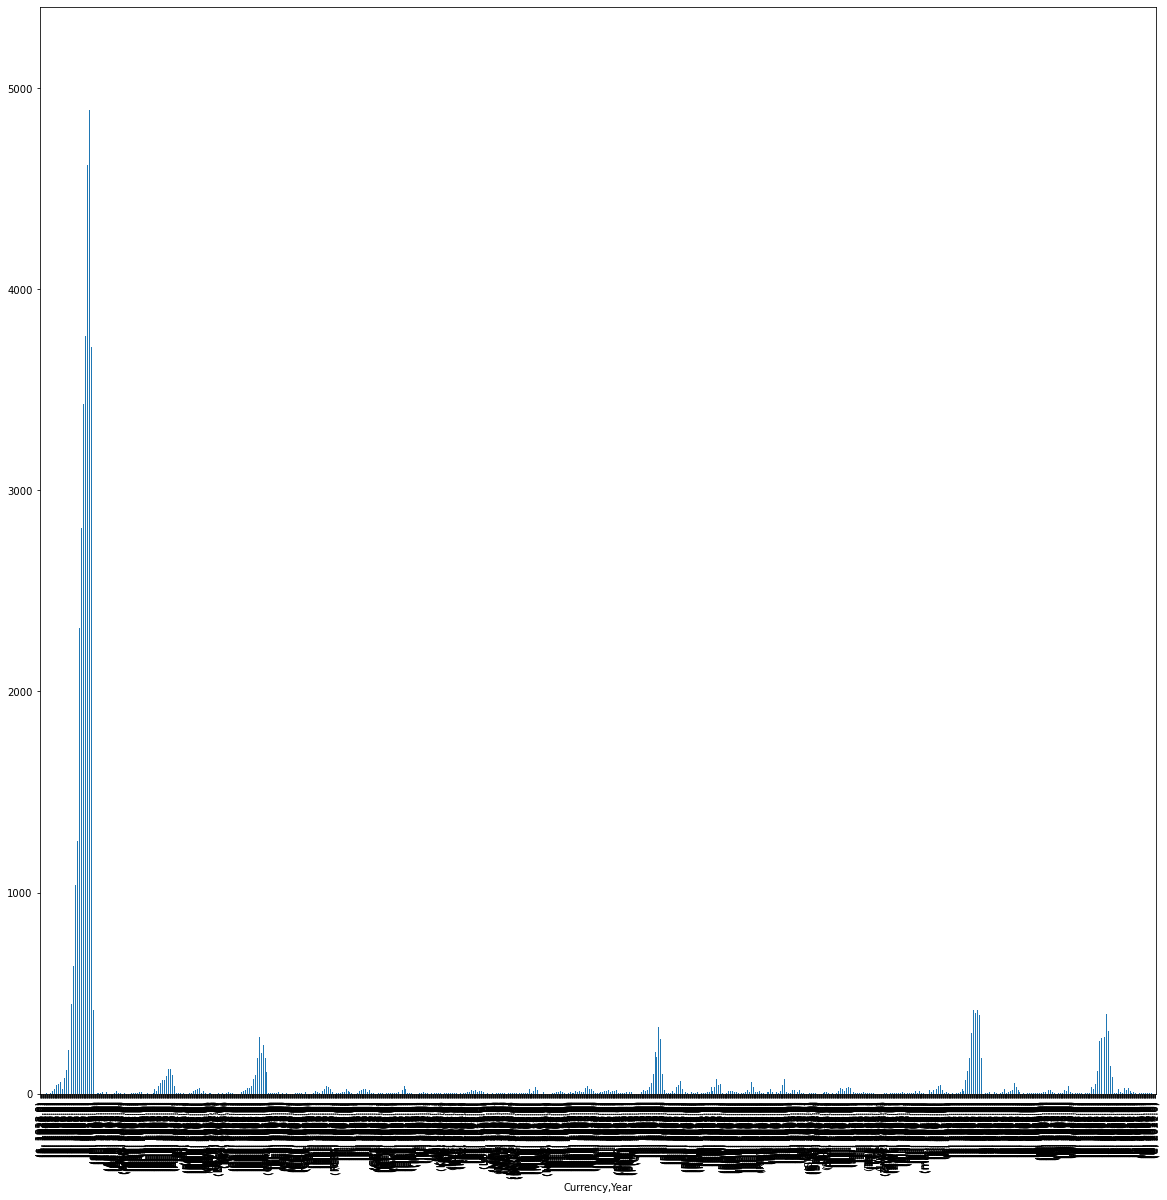

In [313]:
h.User_ID.plot(kind='bar')

#### Which makes and models of vehicles are the most popular
* Car makes: Ford, Toyota, Nissan, BMW and Volkswagen appear to be popular
* Car Models: f-150, 4runner, Ranger, Accord and Wrangler

In [311]:
#4
gb3 = df2.groupby(['Car make']).count()

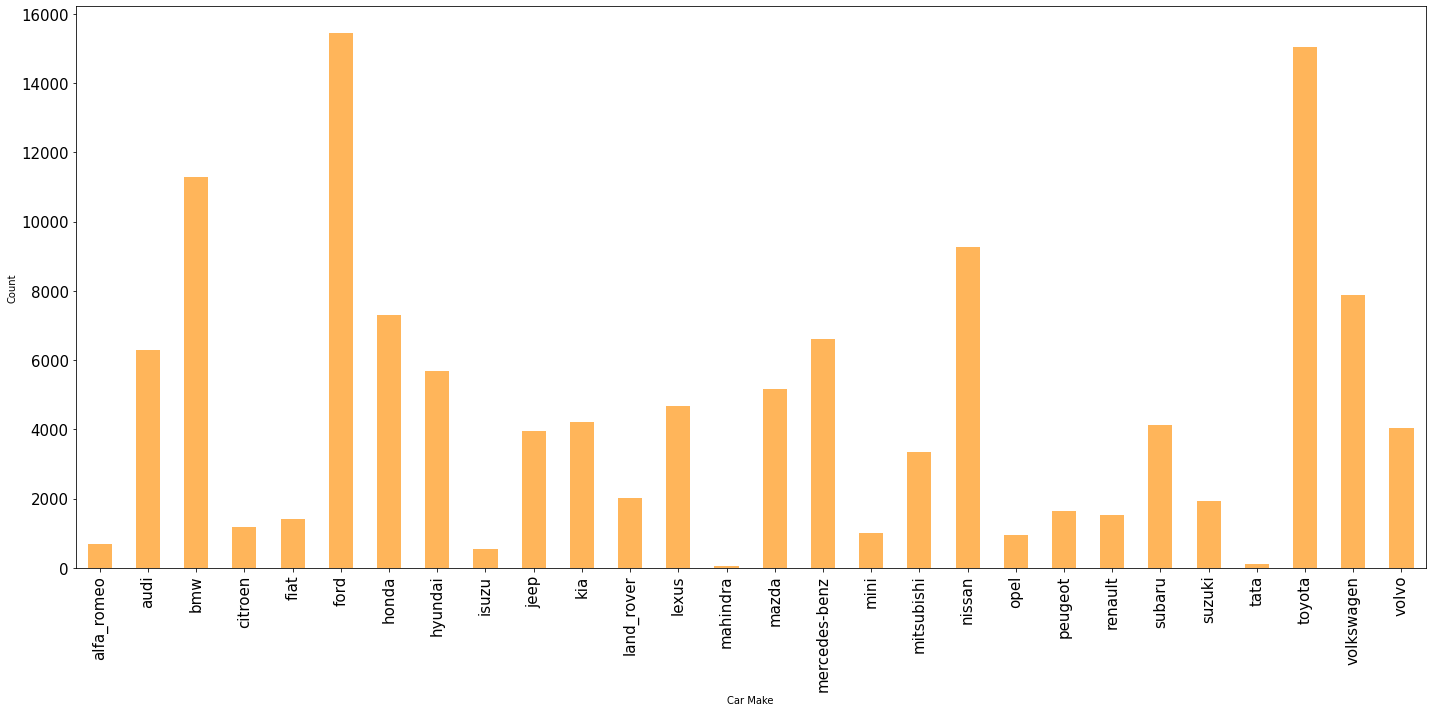

In [317]:
gb3.User_ID.plot(kind='bar', color='#ffb55a', xlabel = 'Car Make', ylabel = 'Count',fontsize=15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [20,10]

In [318]:
gb4 = df2.groupby(['Car Model']).count()

In [319]:
l = gb4.sort_values("User_ID", ascending=False)
l.User_ID.head()

Car Model
f-150       956
4runner     928
ranger      911
accord      890
wrangler    888
Name: User_ID, dtype: int64

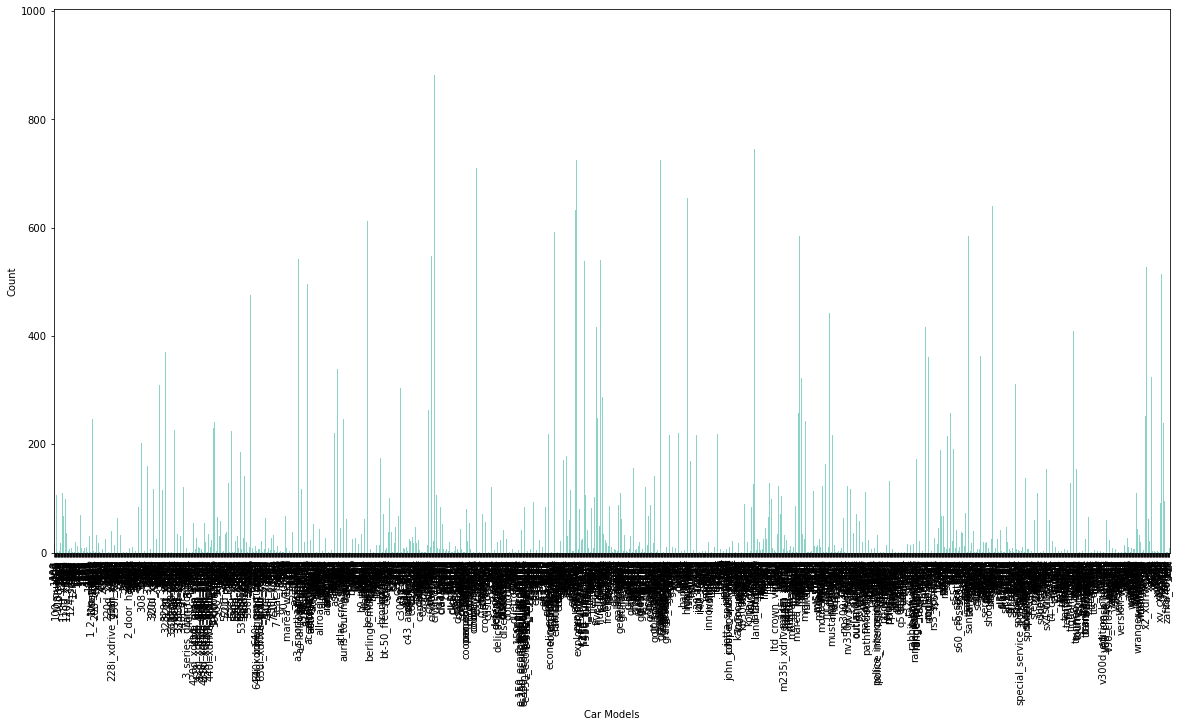

In [320]:
gb4.User_ID.plot(kind='bar',color='#8bd3c7',xlabel='Car Models', ylabel='Count')
plt.rcParams["figure.figsize"] = [15,6]

# 4. Fuel Usage

## 4.1 Outlier Removal
* For removing outliers we look at the US Dollar, Pound, Euro, Canadian Dollar and the Rand
* The method we use is simply the IQR-Method where we ommit any value that is outside the detemined normal range
* Many data points in miles seem like outliers but were kept because vehicles can travel long distances and the IQR-method does not accomadate for this

In [321]:
countries = df2.groupby(['Currency'],).count()

In [322]:
countries = countries.sort_values("User_ID", ascending=False)

In [323]:
#Find top countries
#1
countries.User_ID.head()

Currency
$      91501
£       7373
€       6505
CA$     4424
R       3816
Name: User_ID, dtype: int64

In [324]:
#2 and 3
dollar = df2.loc[df2['Currency'] == '$']
pound = df2.loc[df2['Currency'] == '£']
euro = df2.loc[df2['Currency'] == '€']
canadianDollar = df2.loc[df2['Currency'] == 'CA$']
rand = df2.loc[df2['Currency'] == 'R']

In [325]:
dollar_test2 = dollar
dollar_test2['cost_per_gallon'] = dollar['cost_per_gallon'].str.strip('$')
dollar_test2['cost_per_gallon'] = dollar['cost_per_gallon'].str.replace(',', '')
dollar_test2['cost_per_gallon'] = dollar['cost_per_gallon'].astype(float)
dollar_test2['total_spent'] = dollar['total_spent'].str.strip('$')
dollar_test2['total_spent'] = dollar['total_spent'].str.replace(',', '')
dollar_test2['total_spent'] = dollar['total_spent'].astype(float)

In [326]:
dollar_test2['cost_per_litre'] = (dollar_test2['cost_per_gallon']/3.78541)*16.162092

<AxesSubplot:>

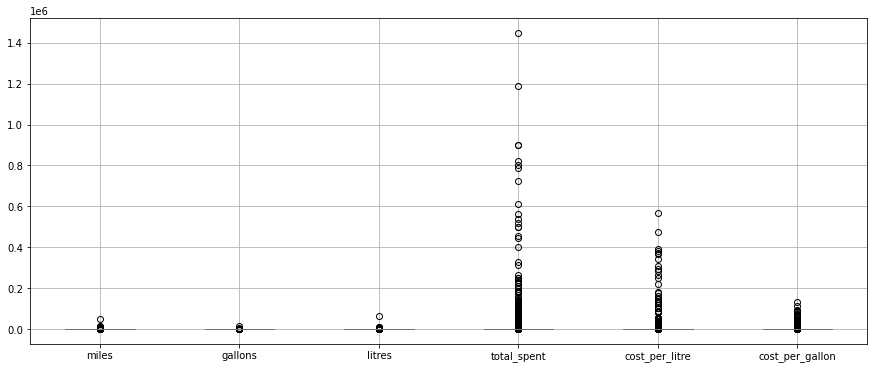

In [327]:
dollar_test2.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [328]:
dmin_g, dmax_g = dollar.gallons.quantile([0.0001, 0.99])
dmin_cg, dmax_cg = dollar.cost_per_gallon.quantile([0.005, 0.99])
dmin_m, dmax_m = dollar.miles.quantile([0.0001, 0.99])
dmin_cl, dmax_cl = dollar.cost_per_litre.quantile([0.005, 0.9])
dmin_l, dmax_l = dollar.litres.quantile([0.001, 0.95])
dmin_t, dmax_t = dollar.total_spent.quantile([0.01, 0.9])

In [329]:
dollar_new = dollar[(dollar.gallons > dmin_g) & (dollar.gallons < dmax_g)]
dollar_new = dollar_new[(dollar_new.litres > dmin_l) & (dollar_new.litres < dmax_l)]
dollar_new = dollar_new[(dollar_new.miles > dmin_m) & (dollar_new.miles < dmax_m)]
dollar_new = dollar_new[(dollar_new.cost_per_gallon > dmin_cg) & (dollar_new.cost_per_gallon < dmax_cg)]
dollar_new = dollar_new[(dollar_new.total_spent > dmin_t) & (dollar_new.total_spent < dmax_t)]
dollar_new = dollar_new[(dollar_new.cost_per_litre > dmin_cl) & (dollar_new.cost_per_litre < dmax_cl)]

<AxesSubplot:>

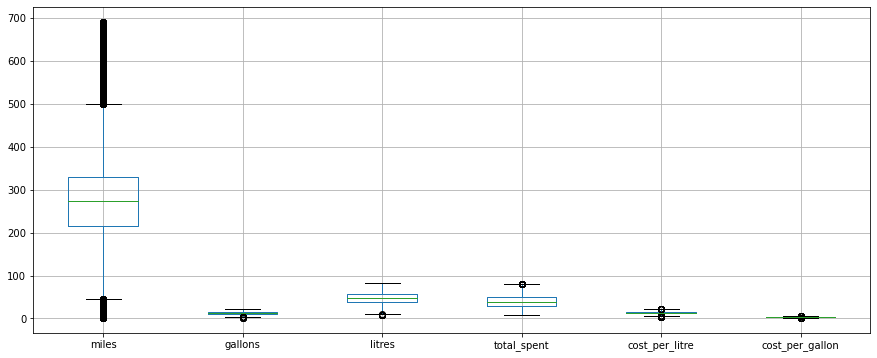

In [330]:
dollar_new.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [331]:
dollar_values_removed = len(dollar)-len(dollar_new)
print('Number of outlier values removed =',dollar_values_removed)

Number of outlier values removed = 15883


### Outliers for £ 

In [332]:
pound_test2 = pound
pound_test2['cost_per_gallon'] = pound['cost_per_gallon'].str.strip('£')
pound_test2['cost_per_gallon'] = pound['cost_per_gallon'].str.replace(',', '')
pound_test2['cost_per_gallon'] = pound['cost_per_gallon'].astype(float)
pound_test2['total_spent'] = pound['total_spent'].str.strip('£')
pound_test2['total_spent'] = pound['total_spent'].str.replace(',', '')
pound_test2['total_spent'] = pound['total_spent'].astype(float)

In [333]:
pound_test2['cost_per_litre'] = (pound_test2['cost_per_gallon']/3.78541)*18.177994

<AxesSubplot:>

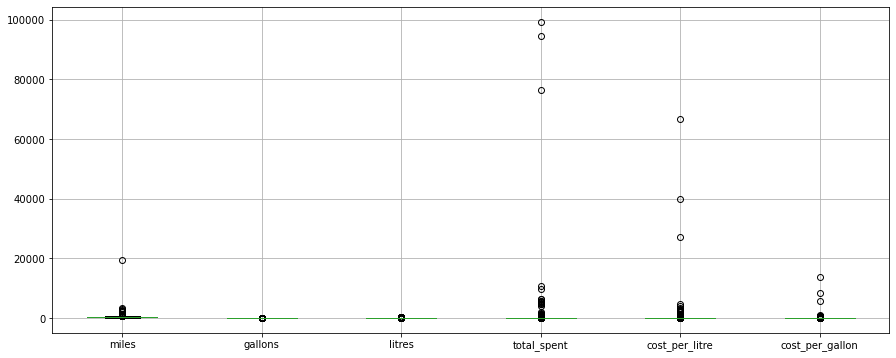

In [334]:
pound_test2.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [335]:
pmin_g, pmax_g = pound.gallons.quantile([0.0001, 0.995])
pmin_cg, pmax_cg = pound.cost_per_gallon.quantile([0.025, 0.99])
pmin_m, pmax_m = pound.miles.quantile([0.0001, 0.99])
pmin_cl, pmax_cl = pound.cost_per_litre.quantile([0.02, 0.99])
pmin_l, pmax_l = pound.litres.quantile([0.0001, 0.99])
pmin_t, pmax_t = pound.total_spent.quantile([0.03, 0.99])

In [336]:
pound_new = pound[(pound.gallons > pmin_g) & (pound.gallons < pmax_g)]
pound_new = pound_new[(pound_new.litres > pmin_l) & (pound_new.litres < pmax_l)]
pound_new = pound_new[(pound_new.miles > pmin_m) & (pound_new.miles < pmax_m)]
pound_new = pound_new[(pound_new.cost_per_gallon > pmin_cg) & (pound_new.cost_per_gallon < pmax_cg)]
pound_new = pound_new[(pound_new.cost_per_litre > pmin_cl) & (pound_new.cost_per_litre < pmax_cl)]
pound_new = pound_new[(pound_new.total_spent > pmin_t) & (pound_new.total_spent < pmax_t)]

<AxesSubplot:>

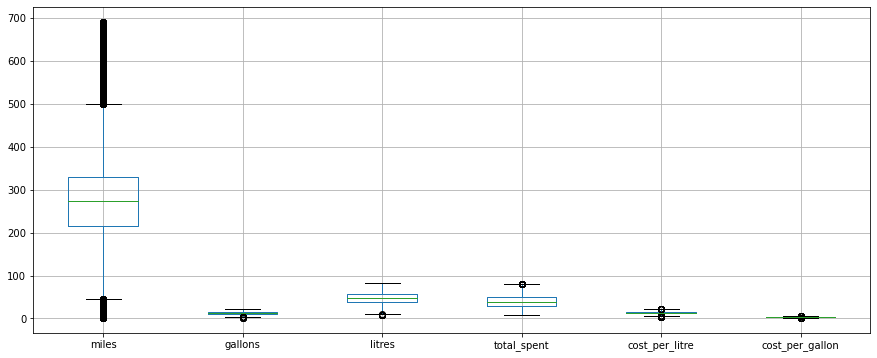

In [337]:
dollar_new.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [338]:
pound_values_removed = len(pound)-len(pound_new)
print('Number of outlier values removed =',pound_values_removed)

Number of outlier values removed = 498


### Outliers for € 

In [339]:
euro_test2 = euro
euro_test2['cost_per_gallon'] = euro['cost_per_gallon'].str.strip('€')
euro_test2['cost_per_gallon'] = euro['cost_per_gallon'].str.replace(',', '')
euro_test2['cost_per_gallon'] = euro['cost_per_gallon'].astype(float)
euro_test2['total_spent'] = euro['total_spent'].str.strip('€')
euro_test2['total_spent'] = euro['total_spent'].str.replace(',', '')
euro_test2['total_spent'] = euro['total_spent'].astype(float)

In [340]:
euro_test2['cost_per_litre'] = (euro_test2['cost_per_gallon']/3.78541)*15.531741

<AxesSubplot:>

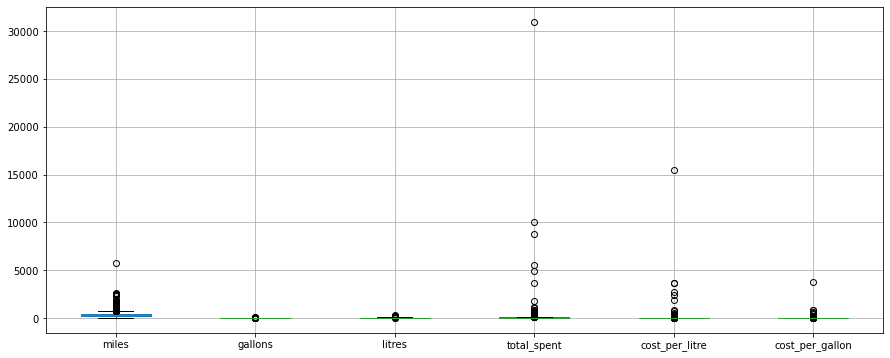

In [341]:
euro_test2.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [342]:
emin_g, emax_g = euro.gallons.quantile([0.0001, 0.9993])
emin_cg, emax_cg = euro.cost_per_gallon.quantile([0.01, 0.99])
emin_m, emax_m = euro.miles.quantile([0.0001, 0.99])
emin_cl, emax_cl = euro.cost_per_litre.quantile([0.01, 0.99])
emin_l, emax_l = euro.litres.quantile([0.0001, 0.99])
emin_t, emax_t = euro.total_spent.quantile([0.03, 0.99])

In [343]:
euro_new = euro[(euro.gallons > emin_g) & (euro.gallons < emax_g)]
euro_new = euro_new[(euro_new.litres > emin_l) & (euro_new.litres < emax_l)]
euro_new = euro_new[(euro_new.miles > emin_m) & (euro_new.miles < emax_m)]
euro_new = euro_new[(euro_new.cost_per_gallon > emin_cg) & (euro_new.cost_per_gallon < emax_cg)]
euro_new = euro_new[(euro_new.cost_per_litre > emin_cl) & (euro_new.cost_per_litre < emax_cl)]
euro_new = euro_new[(euro_new.total_spent > emin_t) & (euro_new.total_spent < emax_t)]

<AxesSubplot:>

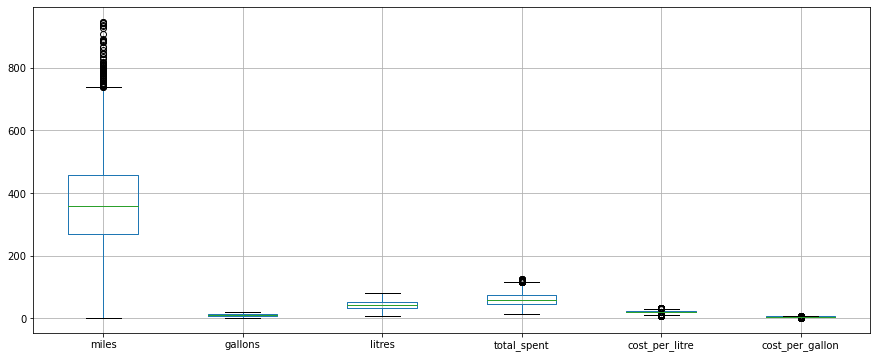

In [344]:
euro_new.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [345]:
euro_values_removed = len(euro)-len(euro_new)
print('Number of outlier values removed =',euro_values_removed)

Number of outlier values removed = 386


### Outliers for CA$

In [346]:
canadianDollar_test2 = canadianDollar
canadianDollar_test2['cost_per_gallon'] = canadianDollar['cost_per_gallon'].str.strip('CA$')
canadianDollar_test2['cost_per_gallon'] = canadianDollar['cost_per_gallon'].str.replace(',', '')
canadianDollar_test2['cost_per_gallon'] = canadianDollar['cost_per_gallon'].astype(float)
canadianDollar_test2['total_spent'] = canadianDollar['total_spent'].str.strip('CA$')
canadianDollar_test2['total_spent'] = canadianDollar['total_spent'].str.replace(',', '')
canadianDollar_test2['total_spent'] = canadianDollar['total_spent'].astype(float)

In [347]:
canadianDollar_test2['cost_per_litre'] = (canadianDollar_test2['cost_per_gallon']/3.78541)*11.444631

<AxesSubplot:>

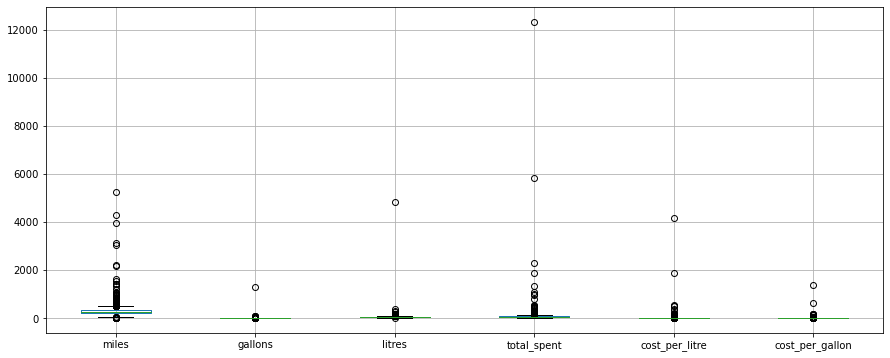

In [348]:
canadianDollar_test2.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [349]:
cmin_g, cmax_g = canadianDollar.gallons.quantile([0.0001, 0.996])
cmin_cg, cmax_cg = canadianDollar.cost_per_gallon.quantile([0.0001, 0.99])
cmin_m, cmax_m = canadianDollar.miles.quantile([0.0001, 0.99])
cmin_cl, cmax_cl = canadianDollar.cost_per_litre.quantile([0.0001, 0.99])
cmin_l, cmax_l = canadianDollar.litres.quantile([0.0001, 0.99])
cmin_t, cmax_t = canadianDollar.total_spent.quantile([0.05, 0.99])
cmin_m, cmax_m

(4.8810615, 698.0715379999979)

In [350]:
canadianDollar_new = canadianDollar[(canadianDollar.gallons > cmin_g) & (canadianDollar.gallons < cmax_g)]
canadianDollar_new = canadianDollar_new[(canadianDollar_new.litres > cmin_l) & (canadianDollar_new.litres < cmax_l)]
canadianDollar_new = canadianDollar_new[(canadianDollar_new.miles > cmin_m) & (canadianDollar_new.miles < cmax_m)]
canadianDollar_new = canadianDollar[(canadianDollar.cost_per_gallon > cmin_cg) & (canadianDollar.cost_per_gallon < cmax_cg)]
canadianDollar_new = canadianDollar_new[(canadianDollar_new.cost_per_litre > cmin_cl) & (canadianDollar_new.cost_per_litre < cmax_cl)]
canadianDollar_new = canadianDollar_new[(canadianDollar_new.total_spent > cmin_t) & (canadianDollar_new.total_spent < cmax_t)]

<AxesSubplot:>

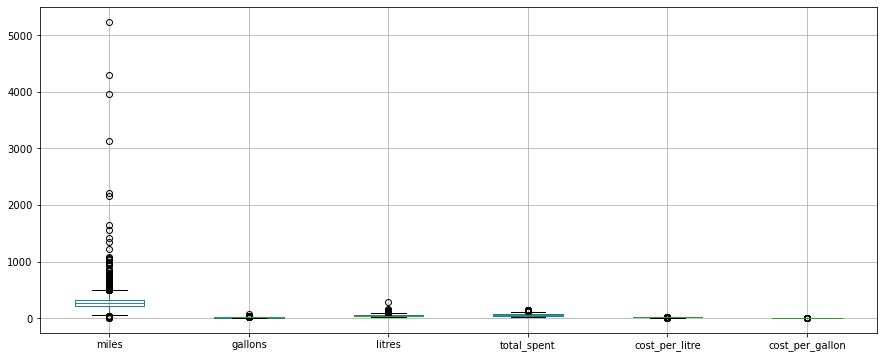

In [351]:
canadianDollar_new.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [352]:
canadianDollar_values_removed = len(canadianDollar)-len(canadianDollar_new)
print('Number of outlier values removed =',canadianDollar_values_removed)

Number of outlier values removed = 290


### Outliers for R

In [353]:
rand_test2 = rand
rand_test2['cost_per_gallon'] = rand['cost_per_gallon'].str.strip('R')
rand_test2['cost_per_gallon'] = rand['cost_per_gallon'].str.replace(',', '')
rand_test2['cost_per_gallon'] = rand['cost_per_gallon'].astype(float)
rand_test2['total_spent'] = rand['total_spent'].str.strip('R')
rand_test2['total_spent'] = rand['total_spent'].str.replace(',', '')
rand_test2['total_spent'] = rand['total_spent'].astype(float)

In [354]:
rand_test2['cost_per_litre'] = (rand_test2['cost_per_gallon']/3.78541)

<AxesSubplot:>

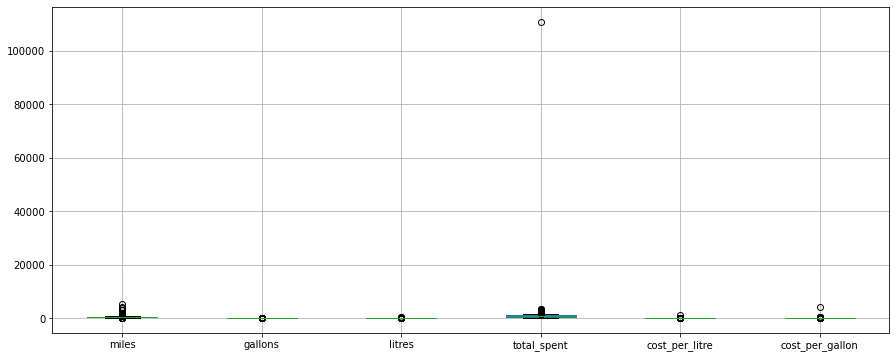

In [355]:
rand_test2.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [356]:
rmin_g, rmax_g = rand.gallons.quantile([0.0001, 0.95])
rmin_cg, rmax_cg = rand.cost_per_gallon.quantile([0.0001, 0.99])
rmin_m, rmax_m = rand.miles.quantile([0.0001, 0.99])
rmin_cl,rmax_cl = rand.cost_per_litre.quantile([0.0001, 0.99])
rmin_l, rmax_l = rand.litres.quantile([0.0001, 0.99])
rmin_t, rmax_t = rand.total_spent.quantile([0.05, 0.99])

In [357]:
rand_new = rand[(rand.gallons > rmin_g) & (rand.gallons < rmax_g)]
rand_new = rand_new[(rand_new.litres > rmin_l) & (rand_new.litres < rmax_l)]
rand_new = rand_new[(rand_new.miles > rmin_m) & (rand_new.miles < rmax_m)]
rand_new = rand[(rand.cost_per_gallon > rmin_cg) & (rand.cost_per_gallon < rmax_cg)]
rand_new = rand_new[(rand_new.cost_per_litre > rmin_cl) & (rand_new.cost_per_litre < rmax_cl)]
rand_new = rand_new[(rand_new.total_spent > rmin_t) & (rand_new.total_spent < rmax_t)]

<AxesSubplot:>

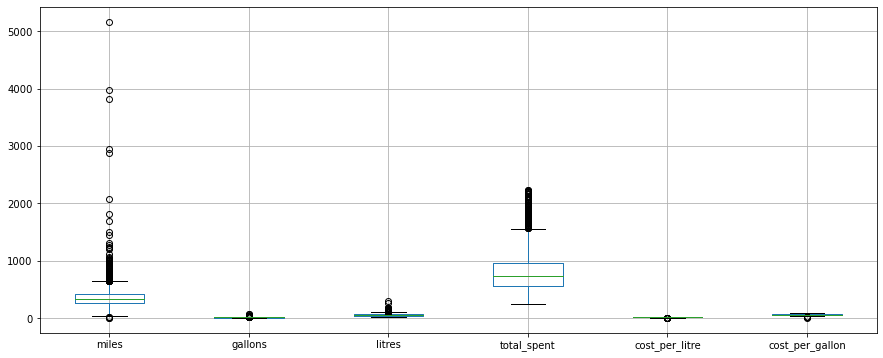

In [358]:
rand_new.boxplot(column = ['miles','gallons','litres','total_spent','cost_per_litre','cost_per_gallon'])

In [359]:
rand_values_removed = len(rand)-len(rand_new)
print('Number of outlier values removed =',rand_values_removed)

Number of outlier values removed = 266


## 4.2 Fuel Efficiency

In [360]:
#1 
#cost per litre per country for January 2022

There is a very big difference in cost per litre in the 5 countries below and some reasons maybe because:
* The exchange rate of any particular currency directly affects the price of fuel
* The price of Crude Oil, which is a commodity of the international market
* Fuel Taxes play a big role in fuel prices as well

In [361]:
cost1 = dollar_new.groupby([dollar_new.date_fueled]).mean()
cost2 = pound_new.groupby([pound_new.date_fueled]).mean()
cost3 = euro_new.groupby([euro_new.date_fueled]).mean()
cost4 = canadianDollar_new.groupby([canadianDollar_new.date_fueled]).mean()
cost5 = rand_new.groupby([rand_new.date_fueled]).mean()

In [362]:
dollar_cost = cost1.cost_per_litre['2022-01'].mean()
pound_cost = cost2.cost_per_litre['2022-01'].mean()
euro_cost = cost3.cost_per_litre['2022-01'].mean()
canadianDollar_cost = cost4.cost_per_litre['2022-01'].mean()
rand_cost = cost5.cost_per_litre['2022-01'].mean()

In [363]:
print('Dollar cost:',dollar_cost)
print('Pound_ post:',pound_cost)
print('Euro cost:',euro_cost)
print('CanadianDollar cost:',canadianDollar_cost)
print('Rand_cost:',rand_cost)

Dollar cost: 14.66642919672787
Pound_ post: 26.32623696891779
Euro cost: 24.712018832021275
CanadianDollar cost: 16.887347340814866
Rand_cost: 18.890933288013127


In [364]:
#2 ...

In [365]:
#3
davg_dist = dollar_new.km.mean()
pavg_dist = pound_new.km.mean()
eavg_dist = euro_new.km.mean()
cavg_dist = canadianDollar_new.km.mean()
ravg_dist = rand_new.km.mean()

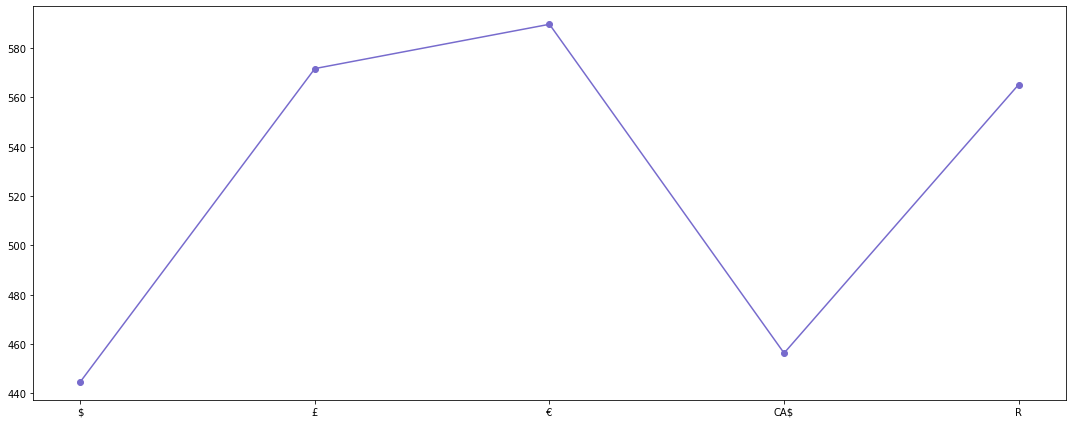

In [367]:
plt.plot(["$","£","€","CA$","R"],[davg_dist,pavg_dist,eavg_dist,cavg_dist,ravg_dist], marker='o', color="#776bcd")
plt.tight_layout()

In [368]:
#4 
#for 'Newer' vehicles we look at vehicle models after 2017 onwards

We see from the illustrated graph that according to the data newer vehicles do not nesscesarily drive further

In [369]:
df2.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km
0,2012-11-07,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,bmw,x3,2009.0,461150.0,45.879169,616.364345,7.443514
1,2012-09-22,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,mercedes-benz,e300,1998.0,133501.0,30.249211,366.516724,8.253160
2,2019-05-04,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,bmw,320d,2010.0,247233.0,40.030711,796.478459,5.025963
3,2021-10-23,Oct 23 2021,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,volkswagen,passat,2004.0,445811.0,12.919604,159.287645,8.110864
4,2021-11-20,Dec 12 2021,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,mazda,3_sport,2010.0,529810.0,34.235248,429.368693,7.973392


In [370]:
new_vehicle = df2[(df2['Year'] >= 2017.0) & (df2['Year'] <= 2022.0)]

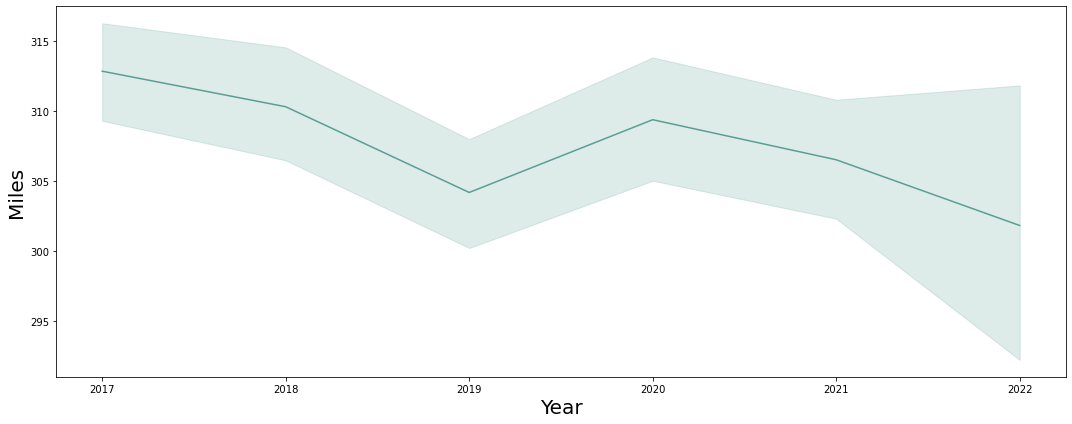

In [371]:
q = sns.lineplot(new_vehicle.Year, new_vehicle['miles'], color='#599e94')
q.set_xlabel('Year', fontsize=20)
q.set_ylabel('Miles', fontsize=20)
plt.tight_layout()

In [372]:
#5 toyota, volkswagen, ford, nissan, bmw
cars = rand_new.groupby('Car make').count()
cars = cars.sort_values("User_ID", ascending=False)
cars.User_ID.head()

Car make
toyota        470
volkswagen    385
ford          337
nissan        330
bmw           281
Name: User_ID, dtype: int64

In [373]:
fe = rand_new.groupby('Car make').mean()

In [374]:
toyota_fe = fe['L/100km']['toyota']
volkswagen_fe = fe['L/100km']['volkswagen']
ford_fe = fe['L/100km']['ford']
nissan_fe = fe['L/100km']['nissan']
bmw_fe = fe['L/100km']['bmw']

print('Fuel Efficiency')
print('Toyota:',toyota_fe,'litres per 100km')
print('Volkswagen:',volkswagen_fe,'litres per 100km')
print('Ford:',ford_fe,'litres per 100km')
print('Nissan:',nissan_fe,'litres per 100km')
print('BMW:',bmw_fe,'litres per 100km')

Fuel Efficiency
Toyota: 12.052330407272434 litres per 100km
Volkswagen: 9.665703508303457 litres per 100km
Ford: 9.173394598218827 litres per 100km
Nissan: 10.947835299810789 litres per 100km
BMW: 10.102261186850036 litres per 100km


In [375]:
#6
dfe = dollar_new.groupby('Car make').mean()
pfe = pound_new.groupby('Car make').mean()
efe = euro_new.groupby('Car make').mean()
cfe = canadianDollar_new.groupby('Car make').mean()
rfe = rand_new.groupby('Car make').mean()

In [376]:
#Dollar
dfe = dfe.sort_values("L/100km", ascending=True)
dfe['L/100km'].head()

Car make
citroen    6.707512
renault    7.631923
peugeot    7.790481
opel       8.428241
fiat       8.469213
Name: L/100km, dtype: float64

In [377]:
#Pound
pfe = pfe.sort_values("L/100km", ascending=True)
pfe['L/100km'].head()

Car make
citroen    6.543093
hyundai    6.834682
honda      7.089595
kia        7.298726
peugeot    7.393401
Name: L/100km, dtype: float64

In [378]:
#Euro
efe = efe.sort_values("L/100km", ascending=True)
efe['L/100km'].head()

Car make
toyota     7.261888
peugeot    7.313411
suzuki     7.327568
citroen    7.350317
opel       7.420661
Name: L/100km, dtype: float64

In [379]:
#Canadian Dollar
cfe = cfe.sort_values("L/100km", ascending=True)
cfe['L/100km'].head()

Car make
fiat           7.549855
mini           8.592968
isuzu          9.591804
mazda         10.010389
mitsubishi    10.022201
Name: L/100km, dtype: float64

In [380]:
#Rand
rfe = rfe.sort_values("L/100km", ascending=True)
rfe['L/100km'].head()

Car make
citroen    6.876555
fiat       7.294362
renault    7.991736
hyundai    8.027662
peugeot    8.833715
Name: L/100km, dtype: float64

In [381]:
print('Most efficient cars per Country')
print('$:','  Citroen')
print('£:','  Tata')
print('€:','  Toyota')
print('CA$:','fiat')
print('R:','  Citroen')

Most efficient cars per Country
$:   Citroen
£:   Tata
€:   Toyota
CA$: fiat
R:   Citroen


In [382]:
#7 ...

In [383]:
df2.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km
0,2012-11-07,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,$,bmw,x3,2009.0,461150.0,45.879169,616.364345,7.443514
1,2012-09-22,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,£,mercedes-benz,e300,1998.0,133501.0,30.249211,366.516724,8.253160
2,2019-05-04,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,£,bmw,320d,2010.0,247233.0,40.030711,796.478459,5.025963
3,2021-10-23,Oct 23 2021,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,$,volkswagen,passat,2004.0,445811.0,12.919604,159.287645,8.110864
4,2021-11-20,Dec 12 2021,105929.0,9.044,$4.639,$41.96,29.5,266.7980,https://www.somewebsite.com/mazda/3_sport/2010...,$,mazda,3_sport,2010.0,529810.0,34.235248,429.368693,7.973392


<AxesSubplot:>

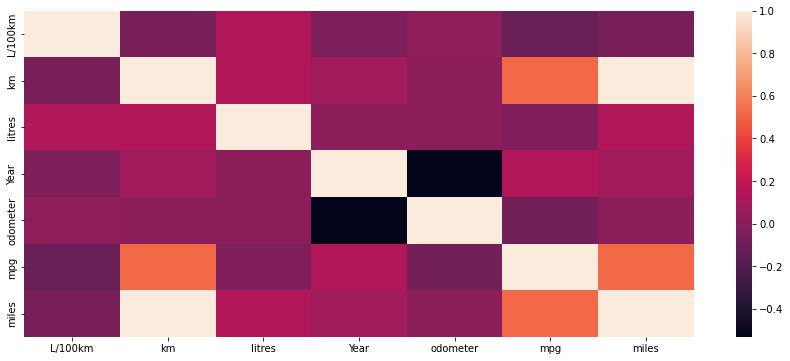

In [384]:
#8
sns.heatmap(df2[['L/100km', 'km', 'litres','Year','odometer','mpg','miles']].corr())

In [385]:
#9 ...

## 4.3 Fuel Usage in SA

In [386]:
#1
# this was already done when doing the outliers question
rand_new.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km,cost_per_litre
216,2018-08-12,Aug 4 2019,41111.0,6.763,60.19,407.04,40.7,275.2541,https://www.somewebsite.com/ford/ecosport/2013...,R,ford,ecosport,2013.0,942891.0,25.600728,442.977433,5.779240,15.900523
222,2016-06-16,Jun 16 2016,2430.0,18.011,48.45,872.69,15.5,279.1705,https://www.somewebsite.com/land_rover/discove...,R,land_rover,discovery,2016.0,426622.0,68.179020,449.280252,15.175165,12.799142
256,2019-06-24,Jan 2 2020,42255.0,11.597,61.17,709.42,36.3,420.9711,https://www.somewebsite.com/audi/a3/2014/324843,R,audi,a3,2014.0,324843.0,43.899400,677.485630,6.479754,16.159412
297,2021-08-15,Aug 18 2021,104329.0,12.038,59.39,714.99,18.8,226.3144,https://www.somewebsite.com/toyota/fortuner/20...,R,toyota,fortuner,2012.0,878394.0,45.568766,364.216816,12.511439,15.689186
313,2015-07-03,Jul 6 2015,86194.0,7.479,50.50,377.67,19.9,148.8321,https://www.somewebsite.com/nissan/1400/2005/2...,R,nissan,1400,2005.0,274539.0,28.311081,239.521452,11.819852,13.340695


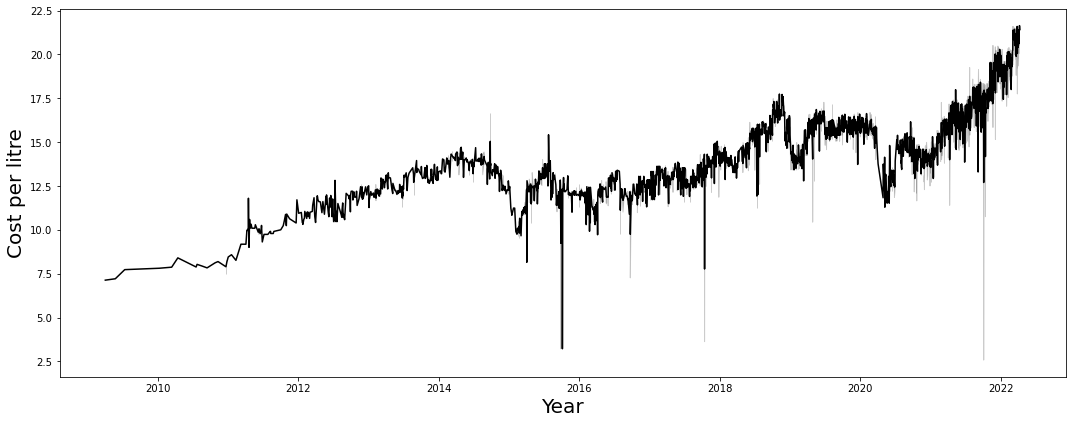

In [387]:
#2
p = sns.lineplot(rand_new.date_fueled,rand_new.cost_per_litre, color='black')
p.set_xlabel('Year', fontsize=20)
p.set_ylabel('Cost per litre', fontsize=20)
plt.tight_layout()

In [388]:
#3
fuel_prices = rand_new

Mon = 0, Tue = 1, Wed = 2, Thurs = 3, Fri = 4, Sat = 5, Sun = 6

In [389]:
fuel_prices["day_of_week"] = fuel_prices['date_fueled'].apply(lambda x: x.weekday())

In [390]:
fuel_prices.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km,cost_per_litre,day_of_week
216,2018-08-12,Aug 4 2019,41111.0,6.763,60.19,407.04,40.7,275.2541,https://www.somewebsite.com/ford/ecosport/2013...,R,ford,ecosport,2013.0,942891.0,25.600728,442.977433,5.779240,15.900523,6
222,2016-06-16,Jun 16 2016,2430.0,18.011,48.45,872.69,15.5,279.1705,https://www.somewebsite.com/land_rover/discove...,R,land_rover,discovery,2016.0,426622.0,68.179020,449.280252,15.175165,12.799142,3
256,2019-06-24,Jan 2 2020,42255.0,11.597,61.17,709.42,36.3,420.9711,https://www.somewebsite.com/audi/a3/2014/324843,R,audi,a3,2014.0,324843.0,43.899400,677.485630,6.479754,16.159412,0
297,2021-08-15,Aug 18 2021,104329.0,12.038,59.39,714.99,18.8,226.3144,https://www.somewebsite.com/toyota/fortuner/20...,R,toyota,fortuner,2012.0,878394.0,45.568766,364.216816,12.511439,15.689186,6
313,2015-07-03,Jul 6 2015,86194.0,7.479,50.50,377.67,19.9,148.8321,https://www.somewebsite.com/nissan/1400/2005/2...,R,nissan,1400,2005.0,274539.0,28.311081,239.521452,11.819852,13.340695,4


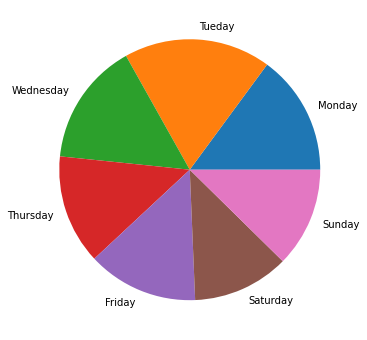

In [391]:
#4
tues = fuel_prices.groupby('day_of_week').count()['User_ID']
labels = ['Monday','Tueday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.pie(tues, labels = labels)
plt.show()

In [392]:
#5
ft = fuel_prices.loc[fuel_prices['date_fueled'].dt.day<8]
ft1 = ft.loc[fuel_prices['day_of_week'] == 1]
#ft1.head()

In [393]:
fw = ft.loc[fuel_prices['day_of_week'] == 2]
#fw.head()

In [394]:
result = pd.concat([ft1,fw])
result

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km,cost_per_litre,day_of_week
552,2017-08-01,Aug 1 2017,18270.0,7.018,43.80,307.36,18.3,128.4294,https://www.somewebsite.com/toyota/hilux/2012/...,R,toyota,hilux,2012.0,141114.0,26.566007,206.686571,12.853282,11.570741,1
2394,2021-02-02,Feb 2 2021,6357.0,9.846,53.83,529.98,25.4,250.0884,https://www.somewebsite.com/volkswagen/t-cross...,R,volkswagen,t-cross,2019.0,967248.0,37.271147,402.477266,9.260435,14.220388,1
2971,2020-02-04,Feb 4 2020,104136.0,15.009,61.17,918.16,25.1,376.7259,https://www.somewebsite.com/mercedes-benz/c200...,R,mercedes-benz,c200,2011.0,147759.0,56.815219,606.280060,9.371118,16.159412,1
3089,2021-10-05,Oct 5 2021,53205.0,9.197,70.22,645.82,42.0,386.2740,https://www.somewebsite.com/suzuki/baleno/2017...,R,suzuki,baleno,2017.0,1014569.0,34.814416,621.646199,5.600359,18.550170,1
3245,2018-06-05,Jun 5 2018,50289.0,10.522,55.72,586.30,33.4,351.4348,https://www.somewebsite.com/ford/ecosport/2014...,R,ford,ecosport,2014.0,635451.0,39.830084,565.578081,7.042367,14.719674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118435,2018-05-02,May 2 2018,62269.0,9.309,56.67,527.54,19.6,182.4564,https://www.somewebsite.com/suzuki/jimny/2012/...,R,suzuki,jimny,2012.0,114973.0,35.238382,293.634383,12.000768,14.970637,2
120392,2012-06-06,Jun 5 2012,11554.0,26.602,41.64,1107.71,19.5,518.7390,https://www.somewebsite.com/land_rover/defende...,R,land_rover,defender,2010.0,121070.0,100.699477,834.827422,12.062311,11.000129,2
120770,2020-07-01,Jul 11 2020,55861.0,12.051,52.69,635.00,17.9,215.7129,https://www.somewebsite.com/bmw/x6/2014/1007859,R,bmw,x6,2014.0,1007859.0,45.617976,347.155398,13.140506,13.919232,2
123634,2022-01-05,Jan 5 2022,286717.0,13.680,70.41,963.20,25.5,348.8400,https://www.somewebsite.com/nissan/x-trail/200...,R,nissan,x-trail,2003.0,355710.0,51.784409,561.402166,9.224120,18.600363,2


In [395]:
#6
result['date_fueled'] = sorted(result['date_fueled']) #.sort(key=lambda date: datetime.strptime(date, "%y-%b-%d"))

In [396]:
result.reset_index(drop=True, inplace=True)

In [397]:
result['price_indicator'] = 'up'

In [398]:
price = 0
for i in range(len(result)):
    if result['cost_per_litre'][i]<price:
        result['price_indicator'][i] = 'Down'
        price = result['cost_per_litre'][i]
        
    elif result['cost_per_litre'][i]>price:
        result['price_indicator'][i] = 'Up'
        price = result['cost_per_litre'][i]

In [399]:
result

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,Car make,Car Model,Year,User_ID,litres,km,L/100km,cost_per_litre,day_of_week,price_indicator
0,2011-04-05,Aug 1 2017,18270.0,7.018,43.80,307.36,18.3,128.4294,https://www.somewebsite.com/toyota/hilux/2012/...,R,toyota,hilux,2012.0,141114.0,26.566007,206.686571,12.853282,11.570741,1,Up
1,2011-11-01,Feb 2 2021,6357.0,9.846,53.83,529.98,25.4,250.0884,https://www.somewebsite.com/volkswagen/t-cross...,R,volkswagen,t-cross,2019.0,967248.0,37.271147,402.477266,9.260435,14.220388,1,Up
2,2011-11-02,Feb 4 2020,104136.0,15.009,61.17,918.16,25.1,376.7259,https://www.somewebsite.com/mercedes-benz/c200...,R,mercedes-benz,c200,2011.0,147759.0,56.815219,606.280060,9.371118,16.159412,1,Up
3,2012-01-04,Oct 5 2021,53205.0,9.197,70.22,645.82,42.0,386.2740,https://www.somewebsite.com/suzuki/baleno/2017...,R,suzuki,baleno,2017.0,1014569.0,34.814416,621.646199,5.600359,18.550170,1,Up
4,2012-06-06,Jun 5 2018,50289.0,10.522,55.72,586.30,33.4,351.4348,https://www.somewebsite.com/ford/ecosport/2014...,R,ford,ecosport,2014.0,635451.0,39.830084,565.578081,7.042367,14.719674,1,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2022-04-05,May 2 2018,62269.0,9.309,56.67,527.54,19.6,182.4564,https://www.somewebsite.com/suzuki/jimny/2012/...,R,suzuki,jimny,2012.0,114973.0,35.238382,293.634383,12.000768,14.970637,2,Up
291,2022-04-05,Jun 5 2012,11554.0,26.602,41.64,1107.71,19.5,518.7390,https://www.somewebsite.com/land_rover/defende...,R,land_rover,defender,2010.0,121070.0,100.699477,834.827422,12.062311,11.000129,2,Down
292,2022-04-05,Jul 11 2020,55861.0,12.051,52.69,635.00,17.9,215.7129,https://www.somewebsite.com/bmw/x6/2014/1007859,R,bmw,x6,2014.0,1007859.0,45.617976,347.155398,13.140506,13.919232,2,Up
293,2022-04-05,Jan 5 2022,286717.0,13.680,70.41,963.20,25.5,348.8400,https://www.somewebsite.com/nissan/x-trail/200...,R,nissan,x-trail,2003.0,355710.0,51.784409,561.402166,9.224120,18.600363,2,Up


* More people **do refuel** on the first **Wednesday** of the month when the prices goes **Down** and
* More people **do not** refuel on the first **Tuesday** of the month when the prices goes **Up**

In [400]:
#7 and 8
group = result.groupby([result.day_of_week, result.price_indicator]).count()

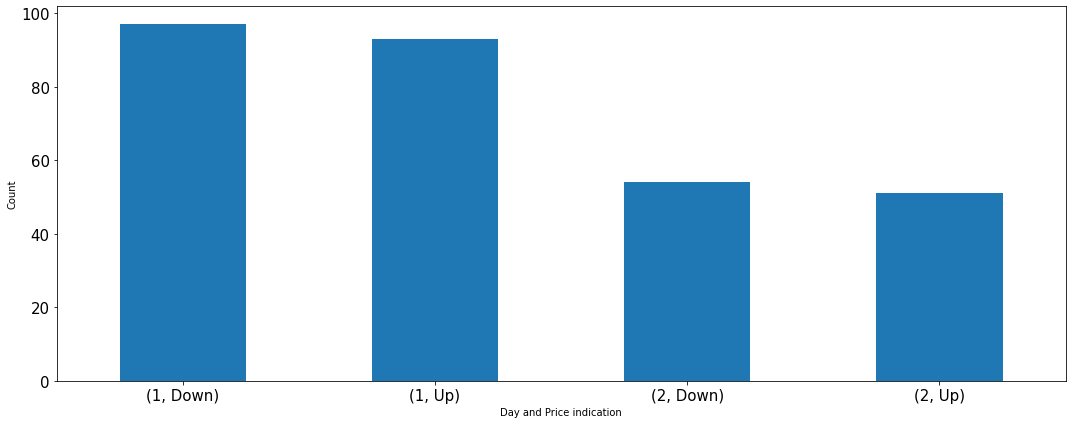

In [403]:
# 1 = Tuesday   2 = Wednesday
group.User_ID.plot(kind='bar', xlabel="Day and Price indication", ylabel='Count', fontsize=15)
plt.xticks(rotation=0, horizontalalignment="center")
plt.tight_layout()